<a href="https://colab.research.google.com/github/ShiviV/DHL-Sentiment-and-Topic-modelling/blob/main/Topic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk import word_tokenize
from nltk import pos_tag
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import RegexpTokenizer
from nltk import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
import re
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [94]:
df = pd.read_csv('Master_data.csv')

In [95]:
df.rename(columns={'reviewer_review': 'reviews'}, inplace=True)

In [96]:
df['reviews'].head(10)

,reviews
0,DHL is the biggest lying package delivery comp...
1,Parcel for Norway delivered to UK address (us)...
2,Shittiest delivery service ever. I got a $500 ...
3,Driver refused to deliver to my house despite ...
4,The entire DHL experience was a nightmare with...
5,Received TELEPHONE CALL not email saying emai...
6,"Wasn't home when tried to deliver, spoke to hi..."
7,"Worst experience, very rude and not cooperating"
8,Booked a courier for collection on Monday and ...
9,"Hey, i am completely disappointed for the deli..."


In [97]:
df['reviews'] = df['reviews'].astype(str)

In [98]:
df['r_processed'] = [reviews.lower() for reviews in df['reviews']]

In [99]:
df['reviews'].head(10)

,reviews
0,DHL is the biggest lying package delivery comp...
1,Parcel for Norway delivered to UK address (us)...
2,Shittiest delivery service ever. I got a $500 ...
3,Driver refused to deliver to my house despite ...
4,The entire DHL experience was a nightmare with...
5,Received TELEPHONE CALL not email saying emai...
6,"Wasn't home when tried to deliver, spoke to hi..."
7,"Worst experience, very rude and not cooperating"
8,Booked a courier for collection on Monday and ...
9,"Hey, i am completely disappointed for the deli..."


In [70]:
df['reviews'] = df['reviews'].apply(preprocess)

In [71]:
df['reviews']

,reviews
0,"[biggest, lying, package, delivery, company, w..."
1,"[parcel, norway, delivered, address, eventuall..."
2,"[shittiest, delivery, service, ever, dollar, p..."
3,"[driver, refused, deliver, house, despite, giv..."
4,"[entire, experience, nightmare, exception, cha..."
...,...
90,[]
91,[]
92,[]
93,[]


In [72]:
all_words = [word for tokens in df['reviews'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['reviews']]
vocab = sorted(list(set(all_words)))

print('{} tokens total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))

3224 tokens total, with a vocabulary size of 740
Max tweet length is 238


In [73]:
word_length = []
for word in all_words:
    word_length.append(len(word))

In [74]:
print('average word size is {}'.format( sum(word_length) / len(word_length)))

average word size is 6.116625310173697


In [75]:
less_than_3_tokens = df[df['reviews'].apply(lambda x: len(x) <= 3)].index

In [76]:
df.drop(less_than_3_tokens, inplace = True)

In [77]:
all_words = [word for tokens in df['reviews'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['reviews']]
vocab = sorted(list(set(all_words)))

print('{} tokens total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))

3224 tokens total, with a vocabulary size of 740
Max tweet length is 238


In [78]:

flat_words = [item for sublist in df['reviews'] for item in sublist]

In [79]:
from nltk.probability import FreqDist # Import the FreqDist object from nltk.probability module

flat_words = [item for sublist in df['reviews'] for item in sublist]
word_freq = FreqDist(flat_words)

In [80]:
word_freq = FreqDist(flat_words)

In [42]:
!pip uninstall gensim -y
!pip install numpy==1.21.0
!pip install gensim

Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached numpy-1.21.0.zip (10.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (numpy)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)


In [81]:
df['reviews'] = df['reviews'].astype(str)

In [82]:
df['reviews']

,reviews
0,"['biggest', 'lying', 'package', 'delivery', 'c..."
1,"['parcel', 'norway', 'delivered', 'address', '..."
2,"['shittiest', 'delivery', 'service', 'ever', '..."
3,"['driver', 'refused', 'deliver', 'house', 'des..."
4,"['entire', 'experience', 'nightmare', 'excepti..."
...,...
75,"['concern', 'pleased', 'commend', 'julius', 'o..."
76,"['awful', 'package', 'sitting', 'jersey', 'day..."
77,"['ordered', 'fruit', 'basket', 'mother', 'nomi..."
78,"['gave', 'star', 'give', 'star', 'could', 'giv..."


In [70]:
!pip install --upgrade numpy

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


In [71]:
pip install --upgrade gensim

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4


In [83]:
lemmatizer = WordNetLemmatizer()

def preprocess(df_text):
    tokens = word_tokenize(df_text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words and len(token) > 3]

    lemmatized =[]

    for w in stopwords_removed:
        lemmatized.append(lemmatizer.lemmatize(w))

    processed = list(filter(lambda x: x.isalpha(), lemmatized))

    return processed


In [84]:
df['reviews']

,reviews
0,"['biggest', 'lying', 'package', 'delivery', 'c..."
1,"['parcel', 'norway', 'delivered', 'address', '..."
2,"['shittiest', 'delivery', 'service', 'ever', '..."
3,"['driver', 'refused', 'deliver', 'house', 'des..."
4,"['entire', 'experience', 'nightmare', 'excepti..."
...,...
75,"['concern', 'pleased', 'commend', 'julius', 'o..."
76,"['awful', 'package', 'sitting', 'jersey', 'day..."
77,"['ordered', 'fruit', 'basket', 'mother', 'nomi..."
78,"['gave', 'star', 'give', 'star', 'could', 'giv..."


In [114]:
!pip uninstall numpy -y
!pip install numpy==1.21.0


  Using cached numpy-1.21.0.zip (10.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: Operation cancelled by user


In [ ]:
!pip uninstall numpy -y

In [ ]:
!pip install numpy==1.26.0


In [ ]:
!pip install gensim


In [81]:
!pip uninstall gensim -y
!pip install numpy==1.21.0
!pip install gensim

Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached numpy-1.21.0.zip (10.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (numpy)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)


In [117]:
!pip uninstall numpy -y
!pip install numpy==1.21.0
!pip install gensim

  Using cached numpy-1.21.0.zip (10.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (numpy)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)


In [119]:
!pip uninstall numpy -y
!pip install numpy==1.21.0
!pip install gensim

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.21.0.zip (10.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: Operation cancelled by user
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
^C


In [ ]:
!pip install numpy==1.26.4
!pip install gensim==4.3.3


In [101]:
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

# Ensure stopwords are downloaded
import nltk
nltk.download('stopwords')

stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocess(df_text):
    """Preprocesses text data for LDA."""
    tokens = word_tokenize(df_text)
    # Relaxed filtering: keep words with length >= 2 (instead of > 3)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words and len(token) >= 2]
    lemmatized = [lemmatizer.lemmatize(w) for w in stopwords_removed]
    # Keep words containing alphabets and numbers, allowing more terms
    processed = list(filter(lambda x: x.isalnum(), lemmatized))
    return processed

# Apply preprocessing
df['reviews'] = df['reviews'].apply(preprocess)

# Create dictionary
text_dict = Dictionary(df['reviews'])

# Less restrictive filtering: allow more terms
text_dict.filter_extremes(no_below=2, no_above=0.95) # Changed no_below to 2 and no_above to 0.95

# Proceed with creating the bow representation and LDA model
tweets_bow = [text_dict.doc2bow(tweet) for tweet in df['reviews']]
# ...

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
from gensim.corpora import Dictionary

text_dict = Dictionary(df.reviews) # Using df.reviews instead of df.text

In [103]:
text_dict.filter_extremes(no_below = 5, no_above = .90)

In [104]:
txt_out = text_dict.token2id

# for k, v in txt_out.items():
#     print(k,v)

In [105]:
tweets_bow = [text_dict.doc2bow(tweet) for tweet in df['reviews']]

In [106]:
tweets_bow[0]

[(0, 1),
 (1, 2),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 3),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 3),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1)]

In [107]:
from gensim.models.ldamodel import LdaModel # Importing the LdaModel class

k = 5
tweets_lda = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)

In [117]:
tweets_lda.show_topics()

[(0,
  '0.045*"dhl" + 0.042*"phone" + 0.038*"number" + 0.036*"nan" + 0.028*"home" + 0.028*"would" + 0.025*"parcel" + 0.024*"delivery" + 0.024*"hour" + 0.022*"service"'),
 (1,
  '0.058*"day" + 0.049*"company" + 0.046*"still" + 0.042*"delivery" + 0.042*"dhl" + 0.039*"review" + 0.036*"star" + 0.030*"another" + 0.029*"way" + 0.029*"waiting"'),
 (2,
  '0.071*"service" + 0.063*"dhl" + 0.047*"time" + 0.043*"day" + 0.040*"driver" + 0.035*"would" + 0.027*"customer" + 0.023*"hour" + 0.019*"could" + 0.017*"delivered"'),
 (3,
  '0.094*"parcel" + 0.078*"delivery" + 0.074*"march" + 0.043*"depot" + 0.038*"driver" + 0.030*"day" + 0.025*"sender" + 0.025*"said" + 0.025*"dhl" + 0.023*"deliver"'),
 (4,
  '0.048*"package" + 0.043*"day" + 0.043*"dhl" + 0.042*"door" + 0.042*"left" + 0.040*"delivery" + 0.037*"said" + 0.031*"company" + 0.026*"review" + 0.026*"away"')]

Topic 0: Customer service and contact details
Key Words: dhl, phone, number, home, parcel, delivery, service

Description: This topic seems to be about issues related to customer service, including contact details (e.g., phone numbers), parcels, and home delivery.

Topic 1: Delivery delays and review
Key Words: day, company, still, delivery, dhl, review, star, waiting

Description: This topic focuses on delivery delays (still waiting), reviews, and customer frustration related to delivery times.

Topic 2: DHL service and delivery time
Key Words: service, dhl, time, driver, day, customer, delivered

Description: This topic appears to be centered around the quality of DHL's service and delivery times, including feedback on drivers and delivery efficiency.

Topic 3: Parcel and delivery issues
Key Words: parcel, delivery, march, depot, driver, day, sender, said, dhl

Description: This topic is related to issues with parcels and deliveries, including the involvement of depots, drivers, and certain dates like "March" when the delivery is expected.

Topic 4: Delivery and package handling
Key Words: package, day, dhl, door, left, delivery, company, review

Description: This topic highlights issues related to packages being left at the door, delays, and reviews, with a focus on delivery handling.



In [108]:
def format_topics_sentences(ldamodel=None, corpus=tweets_bow, texts=df['reviews']):
    # Init output
    sent_topics_df = pd.DataFrame()
    sent_topics_data = [] #list to hold data before creating dataframe
    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[tweets_bow]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                #sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
                # Append data as a list to sent_topics_data
                sent_topics_data.append([int(topic_num), round(prop_topic,4), topic_keywords])
            else:
                break
    # Create DataFrame outside the loop
    sent_topics_df = pd.DataFrame(sent_topics_data, columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=tweets_lda, corpus=tweets_bow, texts=df['reviews'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4,0.9688,"package, day, dhl, door, left, delivery, said,...","[dhl, biggest, lying, package, delivery, compa..."
1,1,0,0.9737,"dhl, phone, number, nan, home, would, parcel, ...","[parcel, norway, delivered, uk, address, u, ev..."
2,2,2,0.5157,"service, dhl, time, day, driver, would, custom...","[shittiest, delivery, service, ever, got, 500,..."
3,3,2,0.9416,"service, dhl, time, day, driver, would, custom...","[driver, refused, deliver, house, despite, giv..."
4,4,2,0.9827,"service, dhl, time, day, driver, would, custom...","[entire, dhl, experience, nightmare, exception..."
5,5,0,0.9378,"dhl, phone, number, nan, home, would, parcel, ...","[received, telephone, call, email, saying, ema..."
6,6,0,0.9686,"dhl, phone, number, nan, home, would, parcel, ...","[home, tried, deliver, spoke, ring, doorbell, ..."
7,7,2,0.5988,"service, dhl, time, day, driver, would, custom...","[worst, experience, rude, cooperating]"
8,8,2,0.9414,"service, dhl, time, day, driver, would, custom...","[booked, courier, collection, monday, show, ca..."
9,9,3,0.9907,"parcel, delivery, march, depot, driver, day, s...","[hey, completely, disappointed, delivery, orde..."


In [109]:
df_dominant_topic.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4,0.9688,"package, day, dhl, door, left, delivery, said,...","[dhl, biggest, lying, package, delivery, compa..."
1,1,0,0.9737,"dhl, phone, number, nan, home, would, parcel, ...","[parcel, norway, delivered, uk, address, u, ev..."
2,2,2,0.5157,"service, dhl, time, day, driver, would, custom...","[shittiest, delivery, service, ever, got, 500,..."
3,3,2,0.9416,"service, dhl, time, day, driver, would, custom...","[driver, refused, deliver, house, despite, giv..."
4,4,2,0.9827,"service, dhl, time, day, driver, would, custom...","[entire, dhl, experience, nightmare, exception..."
5,5,0,0.9378,"dhl, phone, number, nan, home, would, parcel, ...","[received, telephone, call, email, saying, ema..."
6,6,0,0.9686,"dhl, phone, number, nan, home, would, parcel, ...","[home, tried, deliver, spoke, ring, doorbell, ..."
7,7,2,0.5988,"service, dhl, time, day, driver, would, custom...","[worst, experience, rude, cooperating]"
8,8,2,0.9414,"service, dhl, time, day, driver, would, custom...","[booked, courier, collection, monday, show, ca..."
9,9,3,0.9907,"parcel, delivery, march, depot, driver, day, s...","[hey, completely, disappointed, delivery, orde..."


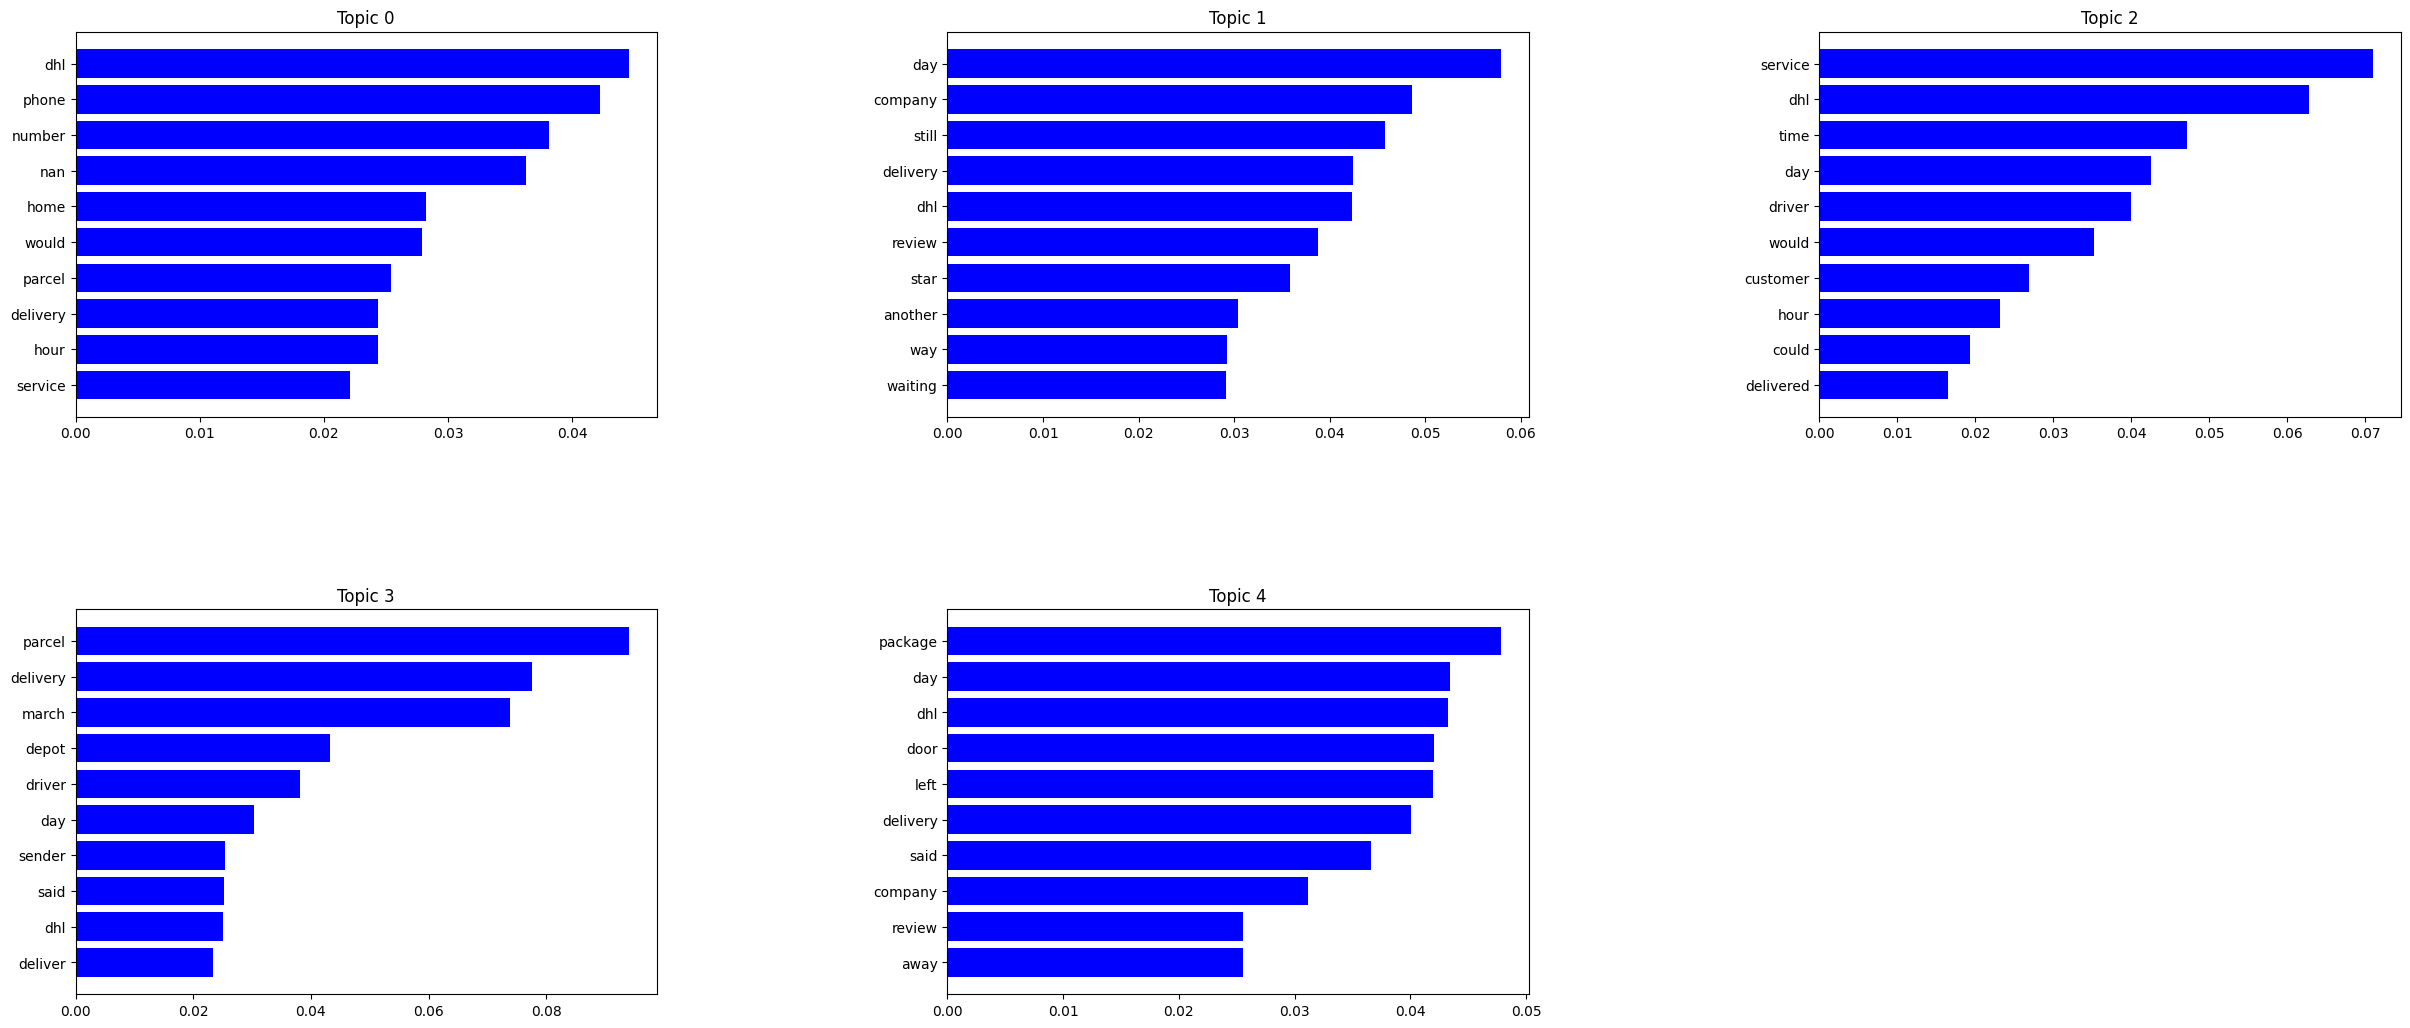

In [110]:
import math # Importing the math module
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Importing the gridspec module

def plot_top_words(lda=tweets_lda, nb_topics=k, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=.5, hspace=.5)
    plt.figure(figsize=(30,20))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))

plot_top_words()

In [111]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.9 MB/s eta 0:00:00


In [112]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(tweets_lda, tweets_bow, dictionary=tweets_lda.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.151784 -0.106477       1        1  28.874409
2     -0.063604  0.020888       2        1  25.878017
0      0.013532  0.086131       3        1  21.528517
4      0.031735  0.114940       4        1  12.759614
1      0.170122 -0.115482       5        1  10.959443, topic_info=         Term       Freq      Total Category  logprob  loglift
95      march  39.000000  39.000000  Default  30.0000  30.0000
33     parcel  66.000000  66.000000  Default  29.0000  29.0000
3         day  57.000000  57.000000  Default  28.0000  28.0000
4    delivery  67.000000  67.000000  Default  27.0000  27.0000
13    package  25.000000  25.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
5         dhl   8.249043  76.976047   Topic5  -3.1627  -0.0224
112      back   3.076546  18.077722   Topic5  -4.1490   0.4401
83      depot   2.380688  27.964047   Topic5  -4.4054  -0.2526
23       call   2.075261  10.118281   Topic5  -4.5428   0.6267
20    address   2.049213  15.941160   Topic5  -4.5554   0.1595

[230 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
88        1  0.600817     able
88        2  0.300409     able
20        1  0.376384  address
20        2  0.376384  address
20        3  0.125461  address
...     ...       ...      ...
40        4  0.105395    would
110       1  0.238175     year
110       2  0.238175     year
110       3  0.238175     year
110       5  0.238175     year

[347 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 5, 2])

In [113]:
df_dominant_topic.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4,0.9688,"package, day, dhl, door, left, delivery, said,...","[dhl, biggest, lying, package, delivery, compa..."
1,1,0,0.9737,"dhl, phone, number, nan, home, would, parcel, ...","[parcel, norway, delivered, uk, address, u, ev..."
2,2,2,0.5157,"service, dhl, time, day, driver, would, custom...","[shittiest, delivery, service, ever, got, 500,..."
3,3,2,0.9416,"service, dhl, time, day, driver, would, custom...","[driver, refused, deliver, house, despite, giv..."
4,4,2,0.9827,"service, dhl, time, day, driver, would, custom...","[entire, dhl, experience, nightmare, exception..."
5,5,0,0.9378,"dhl, phone, number, nan, home, would, parcel, ...","[received, telephone, call, email, saying, ema..."
6,6,0,0.9686,"dhl, phone, number, nan, home, would, parcel, ...","[home, tried, deliver, spoke, ring, doorbell, ..."
7,7,2,0.5988,"service, dhl, time, day, driver, would, custom...","[worst, experience, rude, cooperating]"
8,8,2,0.9414,"service, dhl, time, day, driver, would, custom...","[booked, courier, collection, monday, show, ca..."
9,9,3,0.9907,"parcel, delivery, march, depot, driver, day, s...","[hey, completely, disappointed, delivery, orde..."


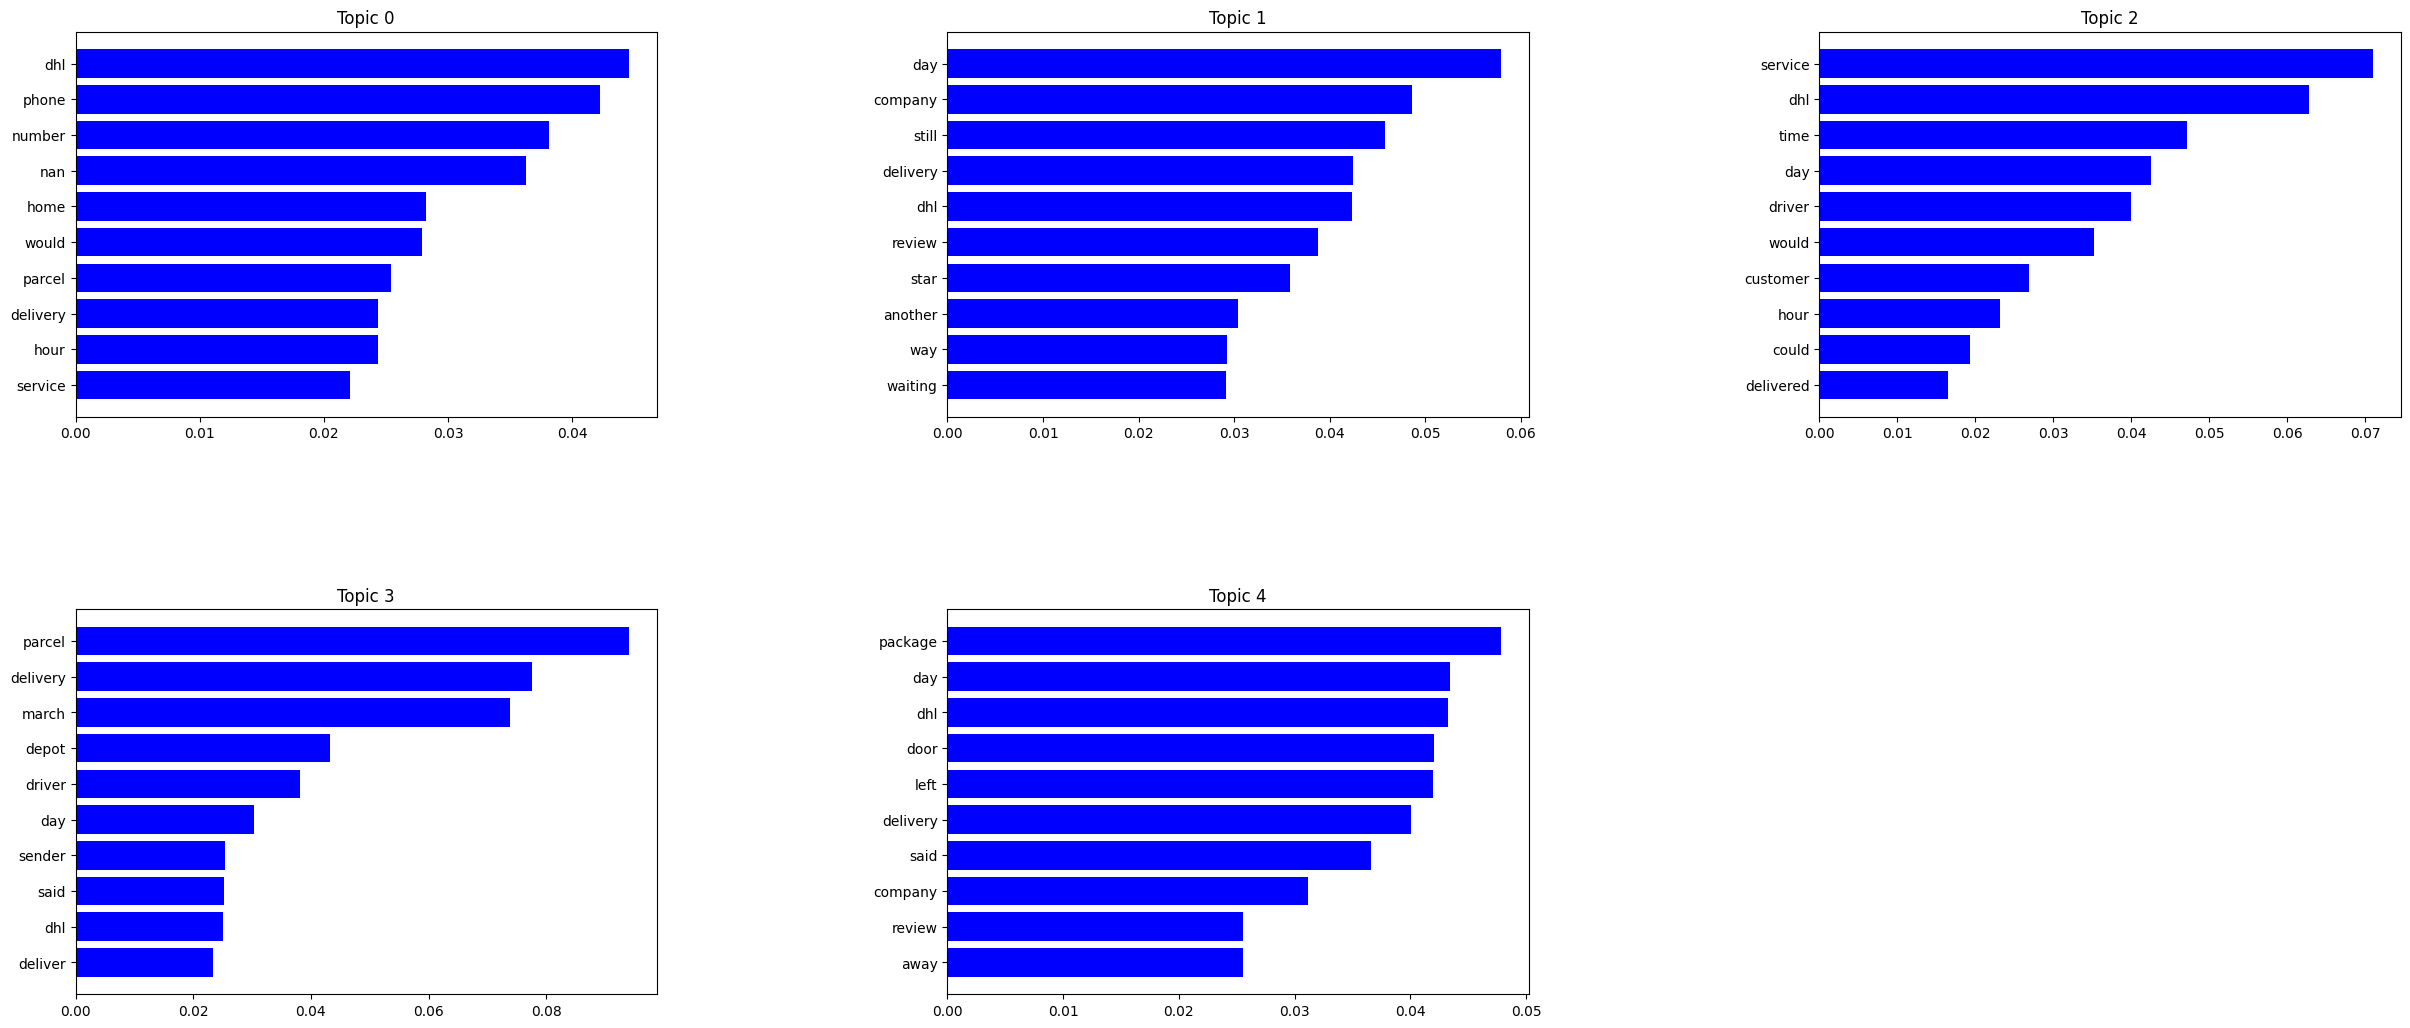

In [114]:
import math # Importing the math module
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Importing the gridspec module

def plot_top_words(lda=tweets_lda, nb_topics=k, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=.5, hspace=.5)
    plt.figure(figsize=(30,20))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))

plot_top_words()

In [115]:
!pip install pyLDAvis

In [116]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(tweets_lda, tweets_bow, dictionary=tweets_lda.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.151784 -0.106477       1        1  28.874375
2     -0.063604  0.020888       2        1  25.877934
0      0.013532  0.086131       3        1  21.528602
4      0.031735  0.114940       4        1  12.759699
1      0.170122 -0.115482       5        1  10.959389, topic_info=         Term       Freq      Total Category  logprob  loglift
95      march  39.000000  39.000000  Default  30.0000  30.0000
33     parcel  66.000000  66.000000  Default  29.0000  29.0000
3         day  57.000000  57.000000  Default  28.0000  28.0000
4    delivery  67.000000  67.000000  Default  27.0000  27.0000
13    package  25.000000  25.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
5         dhl   8.249003  76.976032   Topic5  -3.1627  -0.0224
112      back   3.076531  18.077683   Topic5  -4.1490   0.4401
83      depot   2.380676  27.964005   Topic5  -4.4054  -0.2526
23       call   2.075251  10.118301   Topic5  -4.5428   0.6267
20    address   2.049203  15.941133   Topic5  -4.5554   0.1595

[230 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
88        1  0.600818     able
88        2  0.300409     able
20        1  0.376385  address
20        2  0.376385  address
20        3  0.125462  address
...     ...       ...      ...
40        4  0.105395    would
110       1  0.238175     year
110       2  0.238175     year
110       3  0.238175     year
110       5  0.238175     year

[347 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 5, 2])